# Исследуем данные

**Разделы:**
- [Импортируем бибилиотеки и загрузим данные](#импортируем-бибилиотеки-и-загрузим-данные)
- [Первичный анализ данных](#первичный-анализ-данных)
- [Анализ целевой переменной](#анализ-целевой-переменной)
- [Анализ категориальных признаков](#анализ-категориальных-признаков)
- [Анализ числовых признаков](#анализ-числовых-признаков)
- [Анализ взаимосвязей с целевой переменной](#анализ-взаимосвязей-с-целевой-переменной)

## Импортируем бибилиотеки и загрузим данные

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из data/raw/
data_path = os.path.join('..', 'data', 'raw', 'diabetes_dataset.csv')
df = pd.read_csv(data_path)

print("Размер датасета:", df.shape)
df.head()

Размер датасета: (100000, 31)


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [2]:
# Если нужно удаляем столбец индексов
# df = df.drop(df.columns[0], axis=1)
# df

Описание признаков нашего набора данных.

1) Возраст (`age`): 
    * Описание: Возраст пациента в годах. 
    * Тип данных: *Числовой признак*
2) Пол (`gender`): 
    * Описание: Пол пациента. 
    * Тип данных: Категориальный признак, содержащий 2 уникальных значения (Male/Female).
3) Этническая принадлежность (`ethnicity`): 
    * Описание: Этническая группа пациента
    * Тип данных: Категориальный признак.
4) Уровень образования (`education_level`):
    * Описание: Уровень образования.
    * Тип данных: Категориальный признак.
5) Уровень дохода (`income_level`):
    * Описание: Уровень дохода пациента.
    * Тип данных: Категориальный признак.
6) Статус занятости (`employment_status`):
    * Описание: Трудовой статус.
    * Тип данных: Категориальный признак.
7) Статус курения (`smoking_status`):
    * Описание: Отношение к курению.
    * Тип данных: Категориальный признак.
8) Потребление алкоголя (`alcohol_consumption_per_week`):
    * Описание: Количество алкогольных напитков в неделю.
    * Тип данных: Числовой признак.
9) Физическая активность (`physical_activity_minutes_per_week`):
    * Описание: Минуты физической активности в неделю.
    * Тип данных: Числовой признак.
10) Оценка диеты (`diet_score`):
    * Описание: Оценка качества питания.
    * Тип данных: Числовой признак (шкала 1-10).
11) Часы сна (`sleep_hours_per_day`):
    * Описание: Среднее количество часов сна в сутки.
    * Тип данных: Числовой признак.
12) Экранное время (`screen_time_hours_per_day`):
    * Описание: Часы перед экраном в день.
    * Тип данных: Числовой признак.
13) Семейная история диабета (`family_history_diabetes`): 
    * Описание: Наличие диабета у родственников.
    * Тип данных: Бинарный признак (0/1).
14) История гипертонии (`hypertension_history`):
    * Описание: Наличие гипертонии в анамнезе.
    * Тип данных: Бинарный признак.
15) Сердечно-сосудистые заболевания (`cardiovascular_history`):
    * Описание: Наличие сердечно-сосудистых заболеваний.
    * Тип данных: Бинарный признак.
16) Индекс массы тела (`bmi`):
    * Описание: Индекс массы тела.
    * Тип данных: Числовой признак.
17) Соотношение талии и бедер (`waist_to_hip_ratio`):
    * Описание: Соотношение объемов талии и бедер.
    * Тип данных: Числовой признак.
18) Систолическое давление (`systolic_bp`): 
    * Описание: Верхнее артериальное давление.
    * Тип данных: Числовой признак.
19) Диастолическое давление (`diastolic_bp`):
    * Описание: Нижнее артериальное давление.
    * Тип данных: Числовой признак.
20) Пульс (`heart_rate`):
    * Описание: Частота сердечных сокращений.
    * Тип данных: Числовой признак.
21) Общий холестерин (`cholesterol_total`):
    * Описание: Общий уровень холестерина.
    * Тип данных: Числовой признак.
22) HDL холестерин (`hdl_cholesterol`):
    * Описание: Холестерин липопротеинов высокой плотности.
    * Тип данных: Числовой признак.
23) LDL холестерин (`ldl_cholesterol`):
    * Описание: Холестерин липопротеинов низкой плотности.
    * Тип данных: Числовой признак.
24) Триглицериды (`triglycerides`):
    * Описание: Уровень триглицеридов в крови.
    * Тип данных: Числовой признак.
25) Глюкоза натощак (`glucose_fasting`):
    * Описание: Уровень глюкозы на голодный желудок.
    * Тип данных: Числовой признак.
26) Глюкоза после еды (`glucose_postprandial`):
    * Описание: Уровень глюкозы после приема пищи.
    * Тип данных: Числовой признак.
27) Уровень инсулина (`insulin_level`):
    * Описание: Уровень инсулина в крови.
    * Тип данных: Числовой признак.
28) Гликированный гемоглобин (`hba1c`):
    * Описание: Показатель уровня сахара в крови за 3 месяца.
    * Тип данных: Числовой признак.
29) Оценка риска диабета (`diabetes_risk_score`):
    * Описание: Интегральная оценка риска диабета.
    * Тип данных: Числовой признак.
30) Стадия диабета (`diabetes_stage`):
    * Описание: Стадия диабета.
    * Тип данных: Категориальный признак.
31) Диагностированный диабет (`diagnosed_diabetes`):
    * Описание: Факт диагностики диабета.
    * Тип данных: Бинарный признак.


Целевая переменная: `diagnosed_diabetes` - бинарный признак, указывающий на наличие диагностированного диабета у пациента.

In [3]:
TARGET_COLUMN = 'diagnosed_diabetes'

## Первичный анализ данных

In [4]:
import sys
sys.path.append('..')
from utils.preprocessing import print_info_unique_vals

print_info_unique_vals(df)

| gender          (count:  3)
| ['Male' 'Female' 'Other']
| ethnicity       (count:  5)
| ['Asian' 'White' 'Hispanic' 'Black' 'Other']
| education_level (count:  4)
| ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
| income_level    (count:  5)
| ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
| employment_status (count:  4)
| ['Employed' 'Unemployed' 'Retired' 'Student']
| smoking_status  (count:  3)
| ['Never' 'Former' 'Current']
| diabetes_stage  (count:  5)
| ['Type 2' 'No Diabetes' 'Pre-Diabetes' 'Gestational' 'Type 1']


In [5]:
print("Информация о датасете:")
print(df.info())

print('\n', '-'*20, '\n')

print("\nПропущенные значения:")
print(df.isnull().sum())

print('\n', '-'*20, '\n')

print("\nСтатистика числовых признаков:")
print(df.describe())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  scre

Анализ и основные моменты о датасете(выделим положительные черты и отрицательные):

**Положительные**:
* В датасете нету пропусков и это хорошо. 
* Большой объём данных (более 100 тыс. записей)
* Разнообразие признаков - демографические, поведенческие, клинические и лабораторные показатели

**Отрицательные, требуют обработки или внимания**
* Дисбаланс классов, не сильный но присутсвует
* Выбросы и аномалии в числовых признаках:
    * physical_activity_minutes_per_week: max 833 мин (13.9 часов) - возможны выбросы
    * screen_time_hours_per_day: max 16.8 часов - это что не на человеческом (а может быть дотер проверялся)
* Много категориальных признаков - это не плохо но нужно грамотно закодировать


## Анализ целевой переменной

C:\Users\sinde\AppData\Local\Temp\ipykernel_17308\2889843920.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


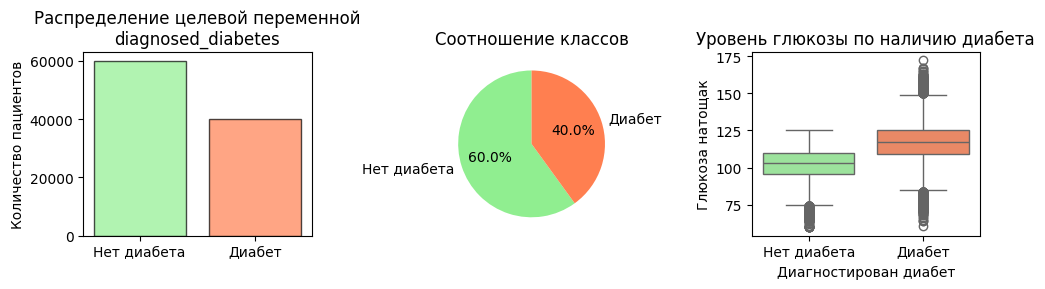

In [6]:
plt.figure(figsize=(10, 3))

class_0 = 'Нет диабета'
class_1 = 'Диабет'

# Распределение целевой переменной
plt.subplot(1, 3, 1)
diagnosis_counts = df['diagnosed_diabetes'].value_counts()
colors = ['lightgreen', 'coral']
plt.bar(
    [class_0, class_1], 
    diagnosis_counts.values, 
    alpha=0.7,
    color=colors, 
    edgecolor='black'
)
plt.title('Распределение целевой переменной\ndiagnosed_diabetes')
plt.ylabel('Количество пациентов')

# Круговой график распределения
# Крассиво и приятно для глаз
plt.subplot(1, 3, 2)
plt.pie(
    diagnosis_counts.values, 
    labels=[class_0, class_1], 
    colors=colors, 
    autopct='%1.1f%%', startangle=90
)
plt.title('Соотношение классов')

# Boxplot ключевых показателей по целевой переменной
plt.subplot(1, 3, 3)
sns.boxplot(
    data=df, 
    x='diagnosed_diabetes', 
    y='glucose_fasting', 
    palette=colors
)
plt.title('Уровень глюкозы по наличию диабета')
plt.xlabel('Диагностирован диабет')
plt.ylabel('Глюкоза натощак')
plt.xticks([0, 1], [class_0, class_1])

plt.tight_layout()
plt.show()

**Выводы по целевой переменной:**
* У пациентов с диабетом уровень глюкозы натощак в среднем значительно выше.
* Дисбаланс классов умеренный (60/40), что не является критичным, но может потребовать осторожности при построении моделей.
* ЛУровень глюкозы явно является сильным предиктором диабета, что логично с медицинской точки зрения.

## Анализ категориальных признаков

gender
 Уникальных значений: 3
 Топ-3: {'Female': 50216, 'Male': 47771, 'Other': 2013}

ethnicity
 Уникальных значений: 5
 Топ-3: {'White': 44997, 'Hispanic': 20103, 'Black': 17986}

education_level
 Уникальных значений: 4
 Топ-3: {'Highschool': 44891, 'Graduate': 35037, 'Postgraduate': 14972}

income_level
 Уникальных значений: 5
 Топ-3: {'Middle': 35152, 'Lower-Middle': 25150, 'Upper-Middle': 19866}

employment_status
 Уникальных значений: 4
 Топ-3: {'Employed': 60175, 'Retired': 21761, 'Unemployed': 11918}

smoking_status
 Уникальных значений: 3
 Топ-3: {'Never': 59813, 'Current': 20176, 'Former': 20011}

diabetes_stage
 Уникальных значений: 5
 Топ-3: {'Type 2': 59774, 'Pre-Diabetes': 31845, 'No Diabetes': 7981}



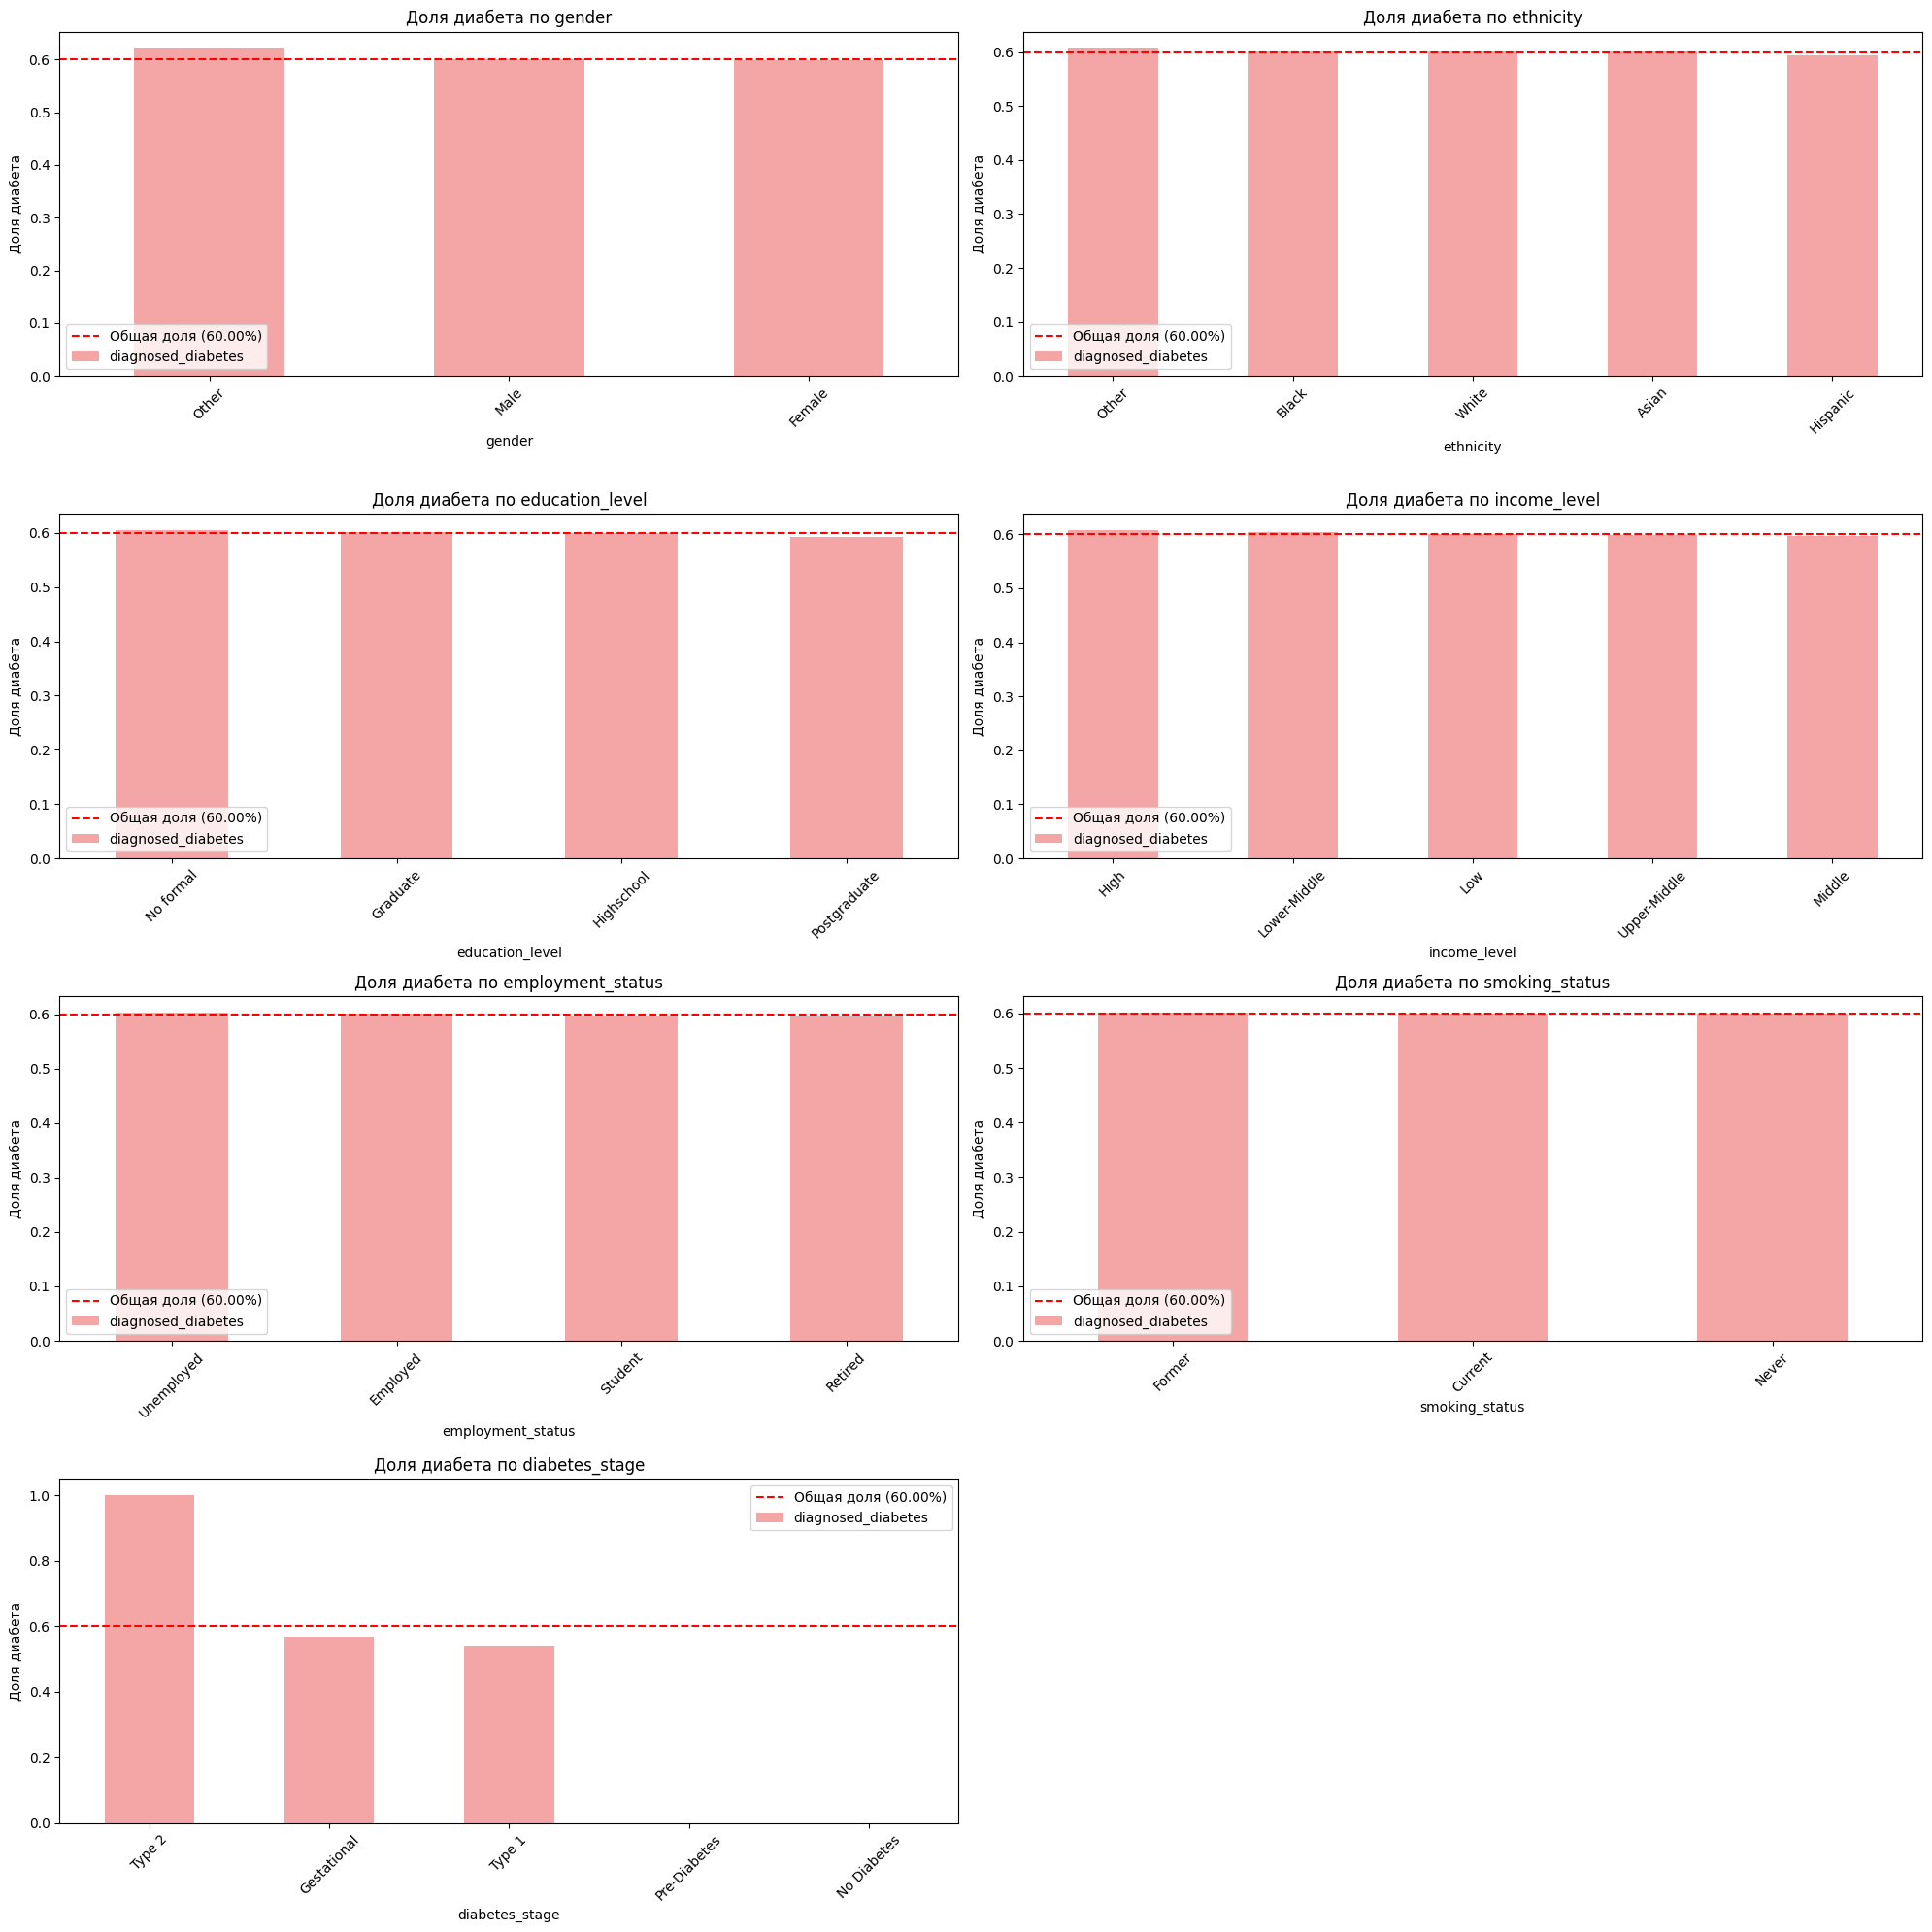

In [7]:
categorical_features = ['gender', 'ethnicity', 'education_level', 'income_level', 
                       'employment_status', 'smoking_status', 'diabetes_stage']

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    
    # Визуализация
    if i < len(axes):
        # Барплот с долей диабета по категориям
        diabetes_by_category = df.groupby(feature)['diagnosed_diabetes'].mean().sort_values(ascending=False)
        diabetes_by_category.plot(kind='bar', ax=axes[i], color='lightcoral', alpha=0.7)
        axes[i].set_title(f'Доля диабета по {feature}')
        axes[i].set_ylabel('Доля диабета')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Добавляем линию среднего значения по всему датасету
        overall_diabetes_rate = df['diagnosed_diabetes'].mean()
        axes[i].axhline(y=overall_diabetes_rate, color='red', linestyle='--', 
                       label=f'Общая доля ({overall_diabetes_rate:.2%})')
        axes[i].legend()
        
        print(f"{feature}\n Уникальных значений: {len(value_counts)}")
        print(f" Топ-3: {value_counts.head(3).to_dict()}\n")
        
# Скрываем последний пустой subplot если нужно
if len(categorical_features) < len(axes):
    for i in range(len(categorical_features), len(axes)):
        axes[i].set_visible(False)
        
plt.tight_layout()
plt.show()

**Выводы:**
* Низкий SES = высокий риск: Низкое образование + низкий доход = максимальный риск
* Образ жизни: Курение значительно повышает риск
* Feature Engineering рекомендации:
    * One-Hot Encoding:
        * smoking_status (3 категории)
        * employment_status (4 категории)
        * diabetes_stage
    * Ordinal Encoding:
        * education_level (Primary < Secondary < Undergraduate < Postgraduate)
        * income_level (Low < Medium < High)
    * Новые признаки:
        * Социальный риск: комбинация education + income
        * Факторы образа жизни: smoking + employment

## Анализ числовых признаков

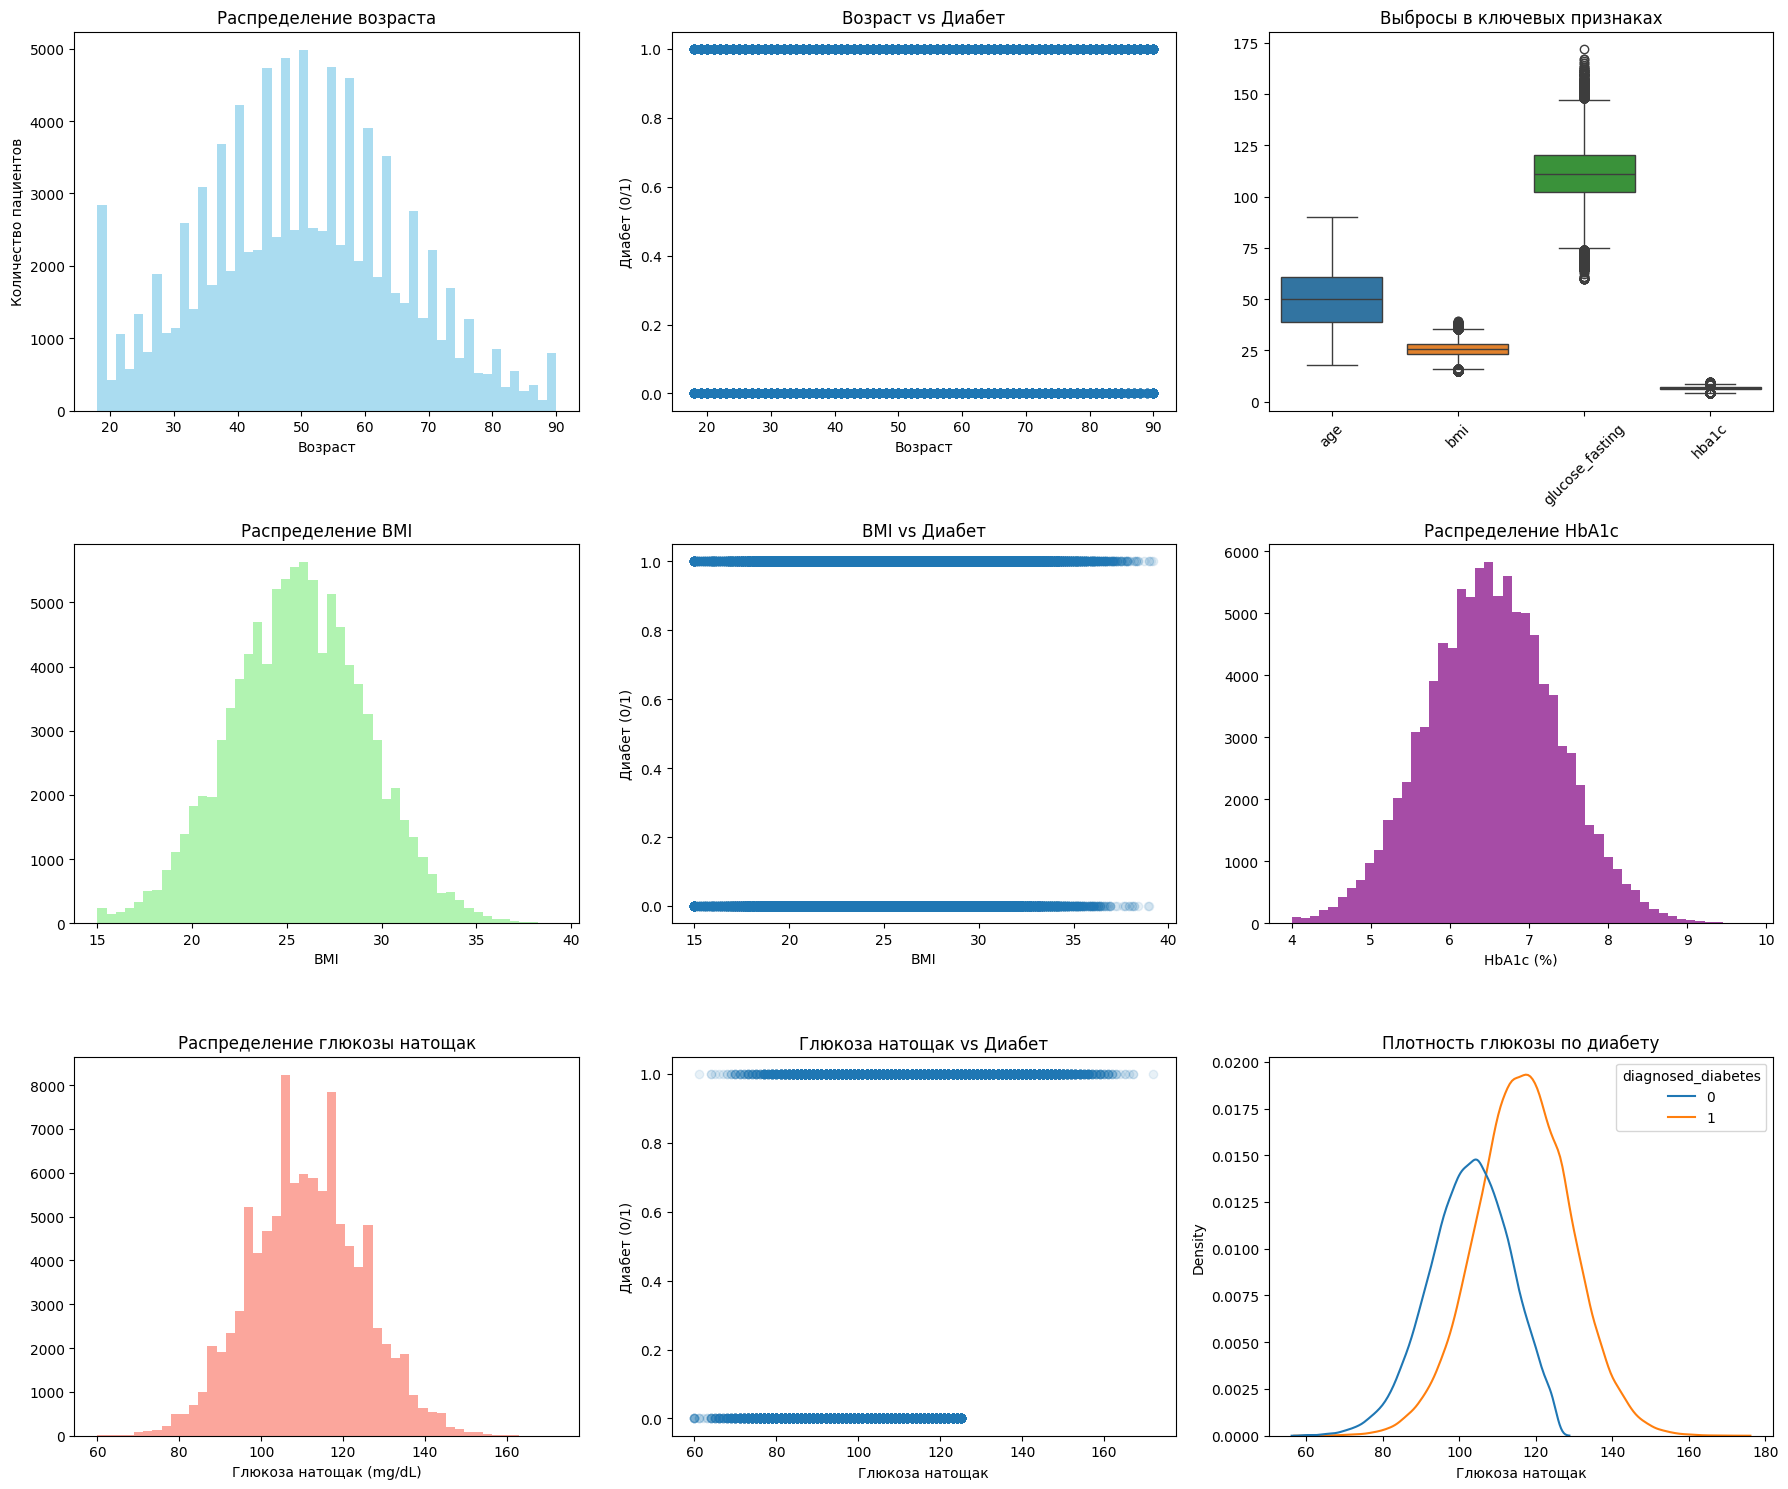

In [8]:
numeric_features = ['age', 'bmi', 'glucose_fasting', 'hba1c', 'blood_pressure', 'cholesterol_total']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Возраст vs Диабет
axes[0,0].hist(df['age'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Распределение возраста')
axes[0,0].set_xlabel('Возраст')
axes[0,0].set_ylabel('Количество пациентов')

axes[0,1].scatter(df['age'], df['diagnosed_diabetes'], alpha=0.1)
axes[0,1].set_title('Возраст vs Диабет')
axes[0,1].set_xlabel('Возраст')
axes[0,1].set_ylabel('Диабет (0/1)')

# BMI vs Диабет
axes[1,0].hist(df['bmi'], bins=50, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Распределение BMI')
axes[1,0].set_xlabel('BMI')

axes[1,1].scatter(df['bmi'], df['diagnosed_diabetes'], alpha=0.1)
axes[1,1].set_title('BMI vs Диабет')
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('Диабет (0/1)')

# Глюкоза натощак vs Диабет
axes[2,0].hist(df['glucose_fasting'], bins=50, alpha=0.7, color='salmon')
axes[2,0].set_title('Распределение глюкозы натощак')
axes[2,0].set_xlabel('Глюкоза натощак (mg/dL)')

axes[2,1].scatter(df['glucose_fasting'], df['diagnosed_diabetes'], alpha=0.1)
axes[2,1].set_title('Глюкоза натощак vs Диабет')
axes[2,1].set_xlabel('Глюкоза натощак')
axes[2,1].set_ylabel('Диабет (0/1)')

# Boxplot для выбросов
sns.boxplot(data=df[['age', 'bmi', 'glucose_fasting', 'hba1c']], ax=axes[0,2])
axes[0,2].set_title('Выбросы в ключевых признаках')
axes[0,2].tick_params(axis='x', rotation=45)

# Распределение HbA1c
axes[1,2].hist(df['hba1c'], bins=50, alpha=0.7, color='purple')
axes[1,2].set_title('Распределение HbA1c')
axes[1,2].set_xlabel('HbA1c (%)')

# Плотность распределения по диабету
sns.kdeplot(data=df, x='glucose_fasting', hue='diagnosed_diabetes', ax=axes[2,2])
axes[2,2].set_title('Плотность глюкозы по диабету')
axes[2,2].set_xlabel('Глюкоза натощак')

plt.tight_layout()
plt.show()

**Выводы:**
* Глюкоза натощак показывает ожидаемое медицинское распределение
* Четкая корреляция глюкозных показателей (glucose_fasting, hba1c) с целевой переменной

## Анализ взаимосвязей с целевой переменной

Ранее уже выполнили этот момент